<a href="https://colab.research.google.com/github/gkmurphy/PUS2024_GMurphy/blob/main/Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df_crime = pd.read_csv("https://github.com/phillydao/phillydao-public-data/blob"
                        "/main/docs/data/arrest_data_daily_by_zip.csv?raw=true")

In [15]:
df_crime.head() #first 5 rows and all cols
df_crime.tail() #last 5 rows and all cols

#if we see that the last row is a garbage catch all, we can delete it
#df_crime.loc(148567) #iloc is index # and loc is index name
#df_crime.drop(148567, inplace=True) #this updates the df instead of doing it in mem w/o in place

,date_value,ZCTA_GEOID,Aggravated Assault,Altered Firearm Serial Number,Arson,Auto Theft,Burglary/Commercial,Burglary/Residential,Carjacking,Criminal Mischief,...,Sexual Assault and Other Sex Offenses,Simple Assault,Strangulation,Theft,Theft from Auto,Threats of Violence,Trespass,Uncategorized Offenses,Victim/Witness Intimidation & Retaliation,Violation of Protection Order
148562,2022-04-20,19150,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148563,2022-04-20,19151,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148564,2022-04-20,19152,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148565,2022-04-20,19153,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148566,2022-04-20,19154,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Descriptive Statistics

In [11]:
df_crime.describe() #params for sample cols
#countable units will never be guassian

,Aggravated Assault,Altered Firearm Serial Number,Arson,Auto Theft,Burglary/Commercial,Burglary/Residential,Carjacking,Criminal Mischief,Disorderly Conduct,Drug Possession,...,Sexual Assault and Other Sex Offenses,Simple Assault,Strangulation,Theft,Theft from Auto,Threats of Violence,Trespass,Uncategorized Offenses,Victim/Witness Intimidation & Retaliation,Violation of Protection Order
count,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,...,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000,148567.000000
mean,0.194788,0.000249,0.003662,0.051768,0.022145,0.049930,0.004294,0.031454,0.002013,0.287735,...,0.013664,0.069901,0.016861,0.106948,0.002241,0.031777,0.011873,0.310177,0.004530,0.027314
std,0.577269,0.018159,0.064497,0.373334,0.304280,0.294299,0.073622,0.216164,0.047585,1.269888,...,0.128738,0.288028,0.133726,0.440056,0.050191,0.187894,0.123584,0.811554,0.073654,0.177166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,62.000000,3.000000,3.000000,39.000000,41.000000,18.000000,3.000000,18.000000,3.000000,57.000000,...,6.000000,10.000000,3.000000,26.000000,3.000000,8.000000,10.000000,41.000000,4.000000,5.000000


#Exploratory Data Analysis

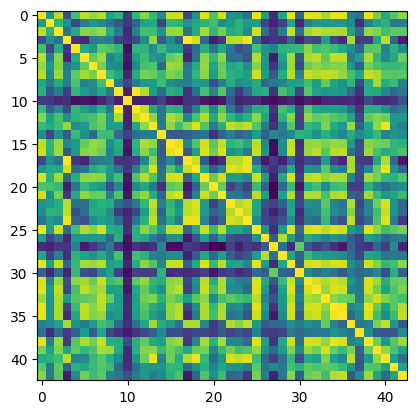

In [14]:
#error because of date_val col doesn't know how to handle it
#drop, drops row by default. specify axis for col
#groupby zipcode instead and sum by date - arrests per zipcode per day
import pylab as plt


plt.imshow(df_crime.groupby("ZCTA_GEOID").sum().drop("date_value", axis=1).corr())

#Correlation graph